In [1]:
# standard imports
import numpy as np
import matplotlib.pyplot as plt 
import datetime
import pandas as pd

#database imports
from snowexsql.db import get_db
from snowexsql.data import PointData, LayerData, ImageData, SiteData
from snowexsql.conversions import query_to_geopandas
%config InlineBackend.figure_format='retina'

In [2]:
# load the database
db_name = 'snow:hackweek@52.32.183.144/snowex'
engine, session = get_db(db_name)

print('snowexsql database successfully loaded!')

snowexsql database successfully loaded!


In [3]:
def parse_veg_class(site_id):
    
    '''
    This function parses snow pit data into three vegetation classes:
        - 1). Treeless, 2). Sparce, and 3). Dense
        
    It uses a python dictionary where:
        (k) keys: are the vegetation classes
        (v) values: are the first digit in the pitID assignment

    
    '''
    
    # Classifying by vegetation coverage 
    veg_class = {'treeless':[1, 2, 3], 'sparse':[4, 5, 6], 'dense':[7, 8, 9]}
     
    vclass = None 
    
    class_id = site_id[0]
    
    if class_id.isnumeric():
        class_id = int(class_id)

        for k,v in veg_class.items():

            if class_id in v: #if the first digit in the site_id is 'v' assign it to the corresponding 'k'
                vclass = k 
                
    return vclass 

In [4]:
def parse_depth_class(site_id):
    
    '''
    This function parses snow pit data into three depth classes:
        - 1). Shallow, 2). Medium, and 3). Deep
        
    It uses a python dictionary where:
        (k) keys: are the depth classes
        (v) values: are the first digit in the pitID assignment
      
  
    '''
        
    # Classifying by 2017 depth 
    depth_class = {'shallow':[1, 4, 7], 'medium':[2, 5, 8], 'deep':[3, 6, 9]} 
   
    dclass = None 
    
    class_id = site_id[0]
    
    if class_id.isnumeric(): #for the outlier TS site
        class_id = int(class_id) #cast as integer

        for k,v in depth_class.items(): #for the key, value pairs in the dict listed above:

            if class_id in v: #if the first digit in the site_id is 'v' assign it to the corresponding 'k'
                dclass = k 

    return dclass 

In [8]:
# Load the database
db_name = 'snow:hackweek@52.32.183.144/snowex'
engine, session = get_db(db_name)

# Query for Layer Data
#result = session.query(LayerData.type).distinct().all()

# Filter for density data
qry = session.query(LayerData).filter(LayerData.type=='temperature')

# Form our dataframe from the query 
df = query_to_geopandas(qry, engine)
df['value'] = df['value'].astype(float)  #cast the value as a float (they are strings)

# Parse snow pit data by the veg/depth matrix
df['veg_class'] = [parse_veg_class(i) for i in df['site_id']] #run the parse_veg function for every site_id
df['depth_class'] = [parse_depth_class(i) for i in df['site_id']] #run the parse_depth funciton for every site_id

## Select columns of interest
#col_list = ['site_id', 'date', 'type', 'latitude',
#       'longitude', 'depth', 'value', 'veg_class', 'depth_class']
#df = df[col_list]

# View a sample --> notice parsed veg_class and depth_class columns were added!
#df.head(10)
df_db = df.copy()

In [9]:
df_db

,site_name,date,time_created,time_updated,id,doi,date_accessed,instrument,type,units,...,depth,site_id,bottom_depth,comments,sample_a,sample_b,sample_c,value,veg_class,depth_class
0,Grand Mesa,2020-02-05,2021-06-01 18:41:20.933098+00:00,None,4270,https://doi.org/10.5067/DUD2VZEVBJ7S,2021-05-30,None,temperature,None,...,10.0,8S18,None,None,None,None,None,-1.5,dense,medium
1,Grand Mesa,2020-02-05,2021-06-01 18:41:20.934579+00:00,None,4271,https://doi.org/10.5067/DUD2VZEVBJ7S,2021-05-30,None,temperature,None,...,0.0,8S18,None,None,None,None,None,-0.6,dense,medium
2,Grand Mesa,2020-02-05,2021-06-01 18:41:21.221846+00:00,None,4373,https://doi.org/10.5067/DUD2VZEVBJ7S,2021-05-30,None,temperature,None,...,77.0,2S10,None,None,None,None,None,-20.0,treeless,medium
3,Grand Mesa,2020-02-05,2021-06-01 18:41:21.223467+00:00,None,4374,https://doi.org/10.5067/DUD2VZEVBJ7S,2021-05-30,None,temperature,None,...,70.0,2S10,None,None,None,None,None,-19.3,treeless,medium
4,Grand Mesa,2020-02-05,2021-06-01 18:41:21.224978+00:00,None,4375,https://doi.org/10.5067/DUD2VZEVBJ7S,2021-05-30,None,temperature,None,...,60.0,2S10,None,None,None,None,None,-12.6,treeless,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670,Grand Mesa,2020-02-08,2021-06-01 18:41:07.362568+00:00,None,61,https://doi.org/10.5067/DUD2VZEVBJ7S,2021-05-30,None,temperature,None,...,40.0,6N16,None,None,None,None,None,-2.3,sparse,deep
1671,Grand Mesa,2020-02-08,2021-06-01 18:41:07.365535+00:00,None,62,https://doi.org/10.5067/DUD2VZEVBJ7S,2021-05-30,None,temperature,None,...,30.0,6N16,None,None,None,None,None,-1.1,sparse,deep
1672,Grand Mesa,2020-02-08,2021-06-01 18:41:07.368755+00:00,None,63,https://doi.org/10.5067/DUD2VZEVBJ7S,2021-05-30,None,temperature,None,...,20.0,6N16,None,None,None,None,None,-1.1,sparse,deep
1673,Grand Mesa,2020-02-08,2021-06-01 18:41:07.372159+00:00,None,64,https://doi.org/10.5067/DUD2VZEVBJ7S,2021-05-30,None,temperature,None,...,10.0,6N16,None,None,None,None,None,-0.5,sparse,deep


In [10]:
# set up and select a pit to work with
import pandas as pd

# import necessary libraries
import pandas as pd
import os
import glob
import geopandas   
# add lat.lon data
import utm  
# use glob to get all the csv files 
# in the folder
path = '/home/jovyan/hot-pow/contributors/Zachary_Miller/pits/'
csv_files = glob.glob(os.path.join(path, "*.csv"))
complete_df = pd.DataFrame()
layer_df = pd.DataFrame()

def utm_to_latlon(coords, zone_number, zone_letter):
    easting = coords[0]
    northing = coords[1]
    return utm.to_latlon(easting, northing, zone_number, zone_letter)


  
#loop over the list of csv files
for f in csv_files:
    print(f)
    df = pd.read_csv(f, header=None)
    dfdata = pd.read_csv(f, header = 13)
    # grab the metadata only
    dfmeta = df.head(12)
    # transpose the metadata to columns
    dftranspose = dfmeta.transpose().head(2)
    # grab column names from the first row
    newheader = dftranspose.iloc[0]
    # remove the column names row
    dftranspose = dftranspose[1:]

    # add column names to transposed metadata
    dftranspose.columns = newheader

    # duplicate rows of metadata to length of snow pit temperature profile
    # duplicate rows of metadata to length of snow pit temperature profile
    dfdup = dftranspose.reindex(dftranspose.index.repeat(len(dfdata))).reset_index(drop=True)
    
    # merge dfdata with dfdup to make a complete df of snow profile temps
    dfmerged = pd.concat([dfdup, dfdata], axis = 1)
    del dfmerged['Hs:'] # remove the total HS measurement column

    # create snow pit location geometry

    gdf = geopandas.GeoDataFrame(
    dfmerged, geometry=geopandas.points_from_xy(dfmerged['Easting:'], dfmerged['Northing:']))


    #complete_df = complete_df.append(Sitedf)
    layer_df = layer_df.append(dfmerged)
    # LayerData dataframe
    #print(dfreorder.head)


/home/jovyan/hot-pow/contributors/Zachary_Miller/pits/sw_t_am_040120_1000.csv
/home/jovyan/hot-pow/contributors/Zachary_Miller/pits/mw_t_pm_040920_1540.csv
/home/jovyan/hot-pow/contributors/Zachary_Miller/pits/sw_t_pm_040120_1635.csv
/home/jovyan/hot-pow/contributors/Zachary_Miller/pits/mw_o_am_033120_1034.csv
/home/jovyan/hot-pow/contributors/Zachary_Miller/pits/cl_o_am_032520_1104.csv
/home/jovyan/hot-pow/contributors/Zachary_Miller/pits/sw_o_pm_042120_1726.csv
/home/jovyan/hot-pow/contributors/Zachary_Miller/pits/sw_t_am_032820_0815.csv
/home/jovyan/hot-pow/contributors/Zachary_Miller/pits/sw_t_pm_041820_1317.csv
/home/jovyan/hot-pow/contributors/Zachary_Miller/pits/sw_o_pm_040620_1700.csv
/home/jovyan/hot-pow/contributors/Zachary_Miller/pits/sw_t_pm_030620_1815.csv
/home/jovyan/hot-pow/contributors/Zachary_Miller/pits/cl_t_pm_032520_1322.csv
/home/jovyan/hot-pow/contributors/Zachary_Miller/pits/sw_o_pm_050320_1910.csv
/home/jovyan/hot-pow/contributors/Zachary_Miller/pits/sw_o_pm_01

In [15]:
# grab the database column names for LayerData (in correct order)
db_colnames = ["site_name", "date", "time_created", "time_updated", "id", "doi", "date_accessed", "instrument", "type", "units", "...", "geom", "time", "depth", "site_id", 
               "bottom_depth", "comments", "sample_a", "sample_b", "sample_c", "value"]

In [21]:
# reorder dfmerged to match database order and add blank columns to fill
dfreorder = pd.DataFrame(columns = db_colnames)

In [25]:
# add Jewel's pit data into appropriate columns - probably a cleaner way to do this, but I'm too new to Py...
dfreorder['geom'] = layer_df['geometry']
dfreorder['depth'] = layer_df['Hs']
dfreorder['date'] = layer_df['Time:']
dfreorder['value'] = layer_df['Temperature']
dfreorder['site_id'] = layer_df['Location:']
dfreorder['type'] = 'temperature'
dfreorder['site_name'] = 'Grand Mesa'
dfreorder['time_updated'] = 'None'
dfreorder['instrument'] = 'None'
dfreorder['units'] = 'None'
dfreorder

,site_name,date,time_created,time_updated,id,doi,date_accessed,instrument,type,units,...,geom,time,depth,site_id,bottom_depth,comments,sample_a,sample_b,sample_c,value
0,Grand Mesa,4/1/20 10:00,NaN,None,NaN,NaN,NaN,None,temperature,None,...,POINT (754184.000 4326540.000),NaN,134,Skyway,NaN,NaN,NaN,NaN,NaN,-4.8
1,Grand Mesa,4/1/20 10:00,NaN,None,NaN,NaN,NaN,None,temperature,None,...,POINT (754184.000 4326540.000),NaN,130,Skyway,NaN,NaN,NaN,NaN,NaN,-5.4
2,Grand Mesa,4/1/20 10:00,NaN,None,NaN,NaN,NaN,None,temperature,None,...,POINT (754184.000 4326540.000),NaN,120,Skyway,NaN,NaN,NaN,NaN,NaN,-5.2
3,Grand Mesa,4/1/20 10:00,NaN,None,NaN,NaN,NaN,None,temperature,None,...,POINT (754184.000 4326540.000),NaN,110,Skyway,NaN,NaN,NaN,NaN,NaN,-4.5
4,Grand Mesa,4/1/20 10:00,NaN,None,NaN,NaN,NaN,None,temperature,None,...,POINT (754184.000 4326540.000),NaN,100,Skyway,NaN,NaN,NaN,NaN,NaN,-4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,Grand Mesa,3/5/20 8:09,NaN,None,NaN,NaN,NaN,None,temperature,None,...,POINT (741079.000 4324261.000),NaN,40,Mesa West,NaN,NaN,NaN,NaN,NaN,-5.0
6,Grand Mesa,3/5/20 8:09,NaN,None,NaN,NaN,NaN,None,temperature,None,...,POINT (741079.000 4324261.000),NaN,30,Mesa West,NaN,NaN,NaN,NaN,NaN,-4.2
7,Grand Mesa,3/5/20 8:09,NaN,None,NaN,NaN,NaN,None,temperature,None,...,POINT (741079.000 4324261.000),NaN,20,Mesa West,NaN,NaN,NaN,NaN,NaN,-3.4
8,Grand Mesa,3/5/20 8:09,NaN,None,NaN,NaN,NaN,None,temperature,None,...,POINT (741079.000 4324261.000),NaN,10,Mesa West,NaN,NaN,NaN,NaN,NaN,-2.7


In [27]:
df_both = df_db.append(dfreorder)

In [40]:
df_both

,site_name,date,time_created,time_updated,id,doi,date_accessed,instrument,type,units,...,site_id,bottom_depth,comments,sample_a,sample_b,sample_c,value,veg_class,depth_class,...
0,Grand Mesa,2020-02-05,2021-06-01 18:41:20.933098+00:00,None,4270,https://doi.org/10.5067/DUD2VZEVBJ7S,2021-05-30,None,temperature,None,...,8S18,None,None,None,None,None,-1.5,dense,medium,NaN
1,Grand Mesa,2020-02-05,2021-06-01 18:41:20.934579+00:00,None,4271,https://doi.org/10.5067/DUD2VZEVBJ7S,2021-05-30,None,temperature,None,...,8S18,None,None,None,None,None,-0.6,dense,medium,NaN
2,Grand Mesa,2020-02-05,2021-06-01 18:41:21.221846+00:00,None,4373,https://doi.org/10.5067/DUD2VZEVBJ7S,2021-05-30,None,temperature,None,...,2S10,None,None,None,None,None,-20.0,treeless,medium,NaN
3,Grand Mesa,2020-02-05,2021-06-01 18:41:21.223467+00:00,None,4374,https://doi.org/10.5067/DUD2VZEVBJ7S,2021-05-30,None,temperature,None,...,2S10,None,None,None,None,None,-19.3,treeless,medium,NaN
4,Grand Mesa,2020-02-05,2021-06-01 18:41:21.224978+00:00,None,4375,https://doi.org/10.5067/DUD2VZEVBJ7S,2021-05-30,None,temperature,None,...,2S10,None,None,None,None,None,-12.6,treeless,medium,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,Grand Mesa,3/5/20 8:09,NaN,None,NaN,NaN,NaN,None,temperature,None,...,Mesa West,NaN,NaN,NaN,NaN,NaN,-5.0,NaN,NaN,NaN
6,Grand Mesa,3/5/20 8:09,NaN,None,NaN,NaN,NaN,None,temperature,None,...,Mesa West,NaN,NaN,NaN,NaN,NaN,-4.2,NaN,NaN,NaN
7,Grand Mesa,3/5/20 8:09,NaN,None,NaN,NaN,NaN,None,temperature,None,...,Mesa West,NaN,NaN,NaN,NaN,NaN,-3.4,NaN,NaN,NaN
8,Grand Mesa,3/5/20 8:09,NaN,None,NaN,NaN,NaN,None,temperature,None,...,Mesa West,NaN,NaN,NaN,NaN,NaN,-2.7,NaN,NaN,NaN


<AxesSubplot:>

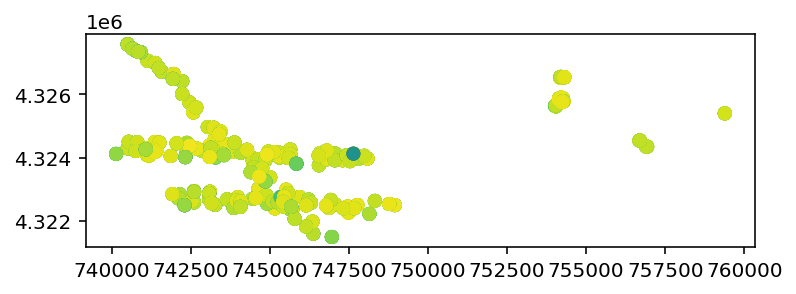

In [42]:
df_both.plot(column='value')

In [35]:
import os
os.getcwd()

'/home/jovyan/hot-pow/contributors/Dillon_Ragar'

In [41]:
df_both.to_csv('/home/jovyan/hot-pow/contributors/Dillon_Ragar/layerdata_temps_db_JL.csv')